# Plot of validation test

This notebook plots the validation test for multiple inversions. It plots the values of the goal function for all the inversions resulted from multiple inversion notebook.

In [5]:
import numpy as np
import cPickle as pickle

In [6]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [60]:
# importing the pickle file of results
result_path = 'l1-tfa-inversion/multiple-reg-56586/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [61]:
# directory to save the figures
#filename = ''
filename = '../../l1-manuscript/figures/anitapolis_l1_gamma.png'

In [62]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [63]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [64]:
# building the matrix of the misfit function
phi_matrix = mfun.l1_misfit_matrix(n, m, inversion['results'])

In [65]:
# calculating the magnetic susceptibily
H0 = (22768.*1e-9)/(4*np.pi*1e-7)
sus = intensity/H0

In [66]:
inversion['regularization']

array([1.e-05, 1.e-06, 0.e+00, 0.e+00, 1.e-05, 1.e-08, 1.e-06])

In [67]:
np.argmin(gamma_matrix)

28

In [51]:
gamma_matrix[3,5]

23.527462882277117

In [52]:
np.argwhere(gamma_matrix<=23.6)

array([[2, 4],
       [3, 5]])

In [53]:
np.argmin(phi_matrix)

18

In [54]:
np.max(gamma_matrix)

57.032251329827595

In [55]:
phi_matrix[2,5]

19.160994700097234

In [56]:
35**2

1225

# Figures

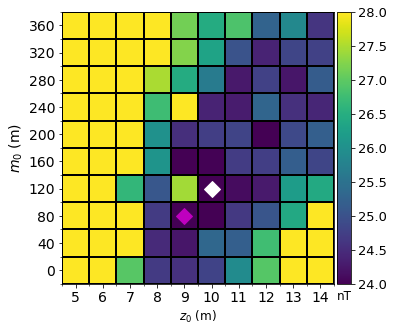

In [59]:
mfun.plot_matrix(z0, intensity, gamma_matrix, int(np.min(gamma_matrix))+1,
                 28., [[3.,5.],[2.,4.]], '$z_0$ (m)', '$m_0$ (m)', 'nT', [], filename)

Application to the field data over the Anitápolis complex, Brazil. Goal function $\Gamma(\mathbf{p})$, in nT,  produced by estimated models with different depths-to-the-top ($ z_0 $) and total-magnetization intensities ($ m_0 $). The corresponding range of magnetic susceptibility $\chi$ is represented in the upper axis by considering a purely induced magnetization with inducing field $\approx 22 \, 768 $ nT. The magenta diamond represents the estimated model that produces the lowest value of $ \Gamma(\mathbf{p})$. The cyan diamond represents an alternative model whose magnetic susceptibility is also compatible with values found at the Jacupiranga complex in a previous work \citep[][ tb. 1]{valdivia-2009}.

In [18]:
mfun.plot_real_matrix(z0, intensity, phi_matrix, 20., 28., sus)

AttributeError: 'module' object has no attribute 'plot_real_matrix'

Application to the field data over the Anitápolis complex, Brazil. Misfit function $\phi(\mathbf{p})$, in nT,  produced by estimated models with different depths-to-the-top ($ z_0 $) and total-magnetization intensities ($ m_0 $). The corresponding range of magnetic susceptibility $\chi$ is represented in the upper axis by considering a purely induced magnetization with inducing field $\approx 22 \, 768 $ nT. The magenta diamond represents the estimated model that produces the lowest value of $ \Gamma(\mathbf{p})$. The cyan diamond represents an alternative model whose magnetic susceptibility is also compatible with values found at the Jacupiranga complex in a previous work \citep[][ tb. 1]{valdivia-2009}.